In [6]:
# import libraries
import pandas as pd
import numpy as np
import nltk
import re
import warnings
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english')) 

In [7]:
# load data
tweets_file = "tweets_daily/"

# months 
march_tweets = tweets_file+"March/csv/"
april_tweets = tweets_file+"April/csv/"
may_tweets = tweets_file+"May/csv/"
june_tweets = tweets_file+"June/csv/"
july_tweets = tweets_file+"July/csv/"

In [3]:
# sample dataframe
df = pd.read_csv(march_tweets+"march_20")

In [4]:
# different features
df.columns

Index(['coordinates', 'created_at', 'hashtags', 'media', 'urls',
       'favorite_count', 'id', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
       'possibly_sensitive', 'retweet_count', 'retweet_id',
       'retweet_screen_name', 'source', 'text', 'tweet_url', 'user_created_at',
       'user_screen_name', 'user_default_profile_image', 'user_description',
       'user_favourites_count', 'user_followers_count', 'user_friends_count',
       'user_listed_count', 'user_location', 'user_name', 'user_screen_name.1',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified'],
      dtype='object')

In [8]:
# initializing dataframes
# initialize for march
start_date = 20
end_date = 30

march_df = pd.DataFrame()

for i in range(start_date,end_date+1):
    temp_df = pd.read_csv(march_tweets+"march_"+str(i))
    march_df = march_df.append(temp_df)

In [9]:
# initialize for april
start_date = 1
end_date = 29

april_df = pd.DataFrame()

for i in range(start_date,end_date+1):
    temp_df = pd.read_csv(april_tweets+"april_"+str(i))
    april_df = april_df.append(temp_df)
    
april_df = april_df.append(pd.read_csv(april_tweets+"april_30.csv"))

In [10]:
# initialize for may
start_date = 1
end_date = 30

may_df = pd.DataFrame()

for i in range(start_date,end_date+1):
    temp_df = pd.read_csv(may_tweets+"may_"+str(i))
    may_df = may_df.append(temp_df)
    
may_df = may_df.append(pd.read_csv(may_tweets+"may_31.csv"))

In [11]:
# initialize for june
start_date = 1
end_date = 29

june_df = pd.DataFrame()

for i in range(start_date,end_date+1):
    temp_df = pd.read_csv(june_tweets+"june_"+str(i))
    june_df = june_df.append(temp_df)
    
june_df = june_df.append(pd.read_csv(june_tweets+"june_30.csv"))

In [12]:
# initialize for july
start_date = 1
end_date = 21

july_df = pd.DataFrame()

for i in range(start_date,end_date+1):
    temp_df = pd.read_csv(july_tweets+"july_"+str(i))
    july_df = july_df.append(temp_df)

for i in range(22,32):
    july_df = july_df.append(pd.read_csv(july_tweets+"july_"+str(i)+".csv"))

In [13]:
# join data for all months into one
joint_df = pd.DataFrame()
tweet_dfs = [march_df,april_df,may_df,june_df,july_df]
for df in tweet_dfs:
    joint_df = joint_df.append(df)

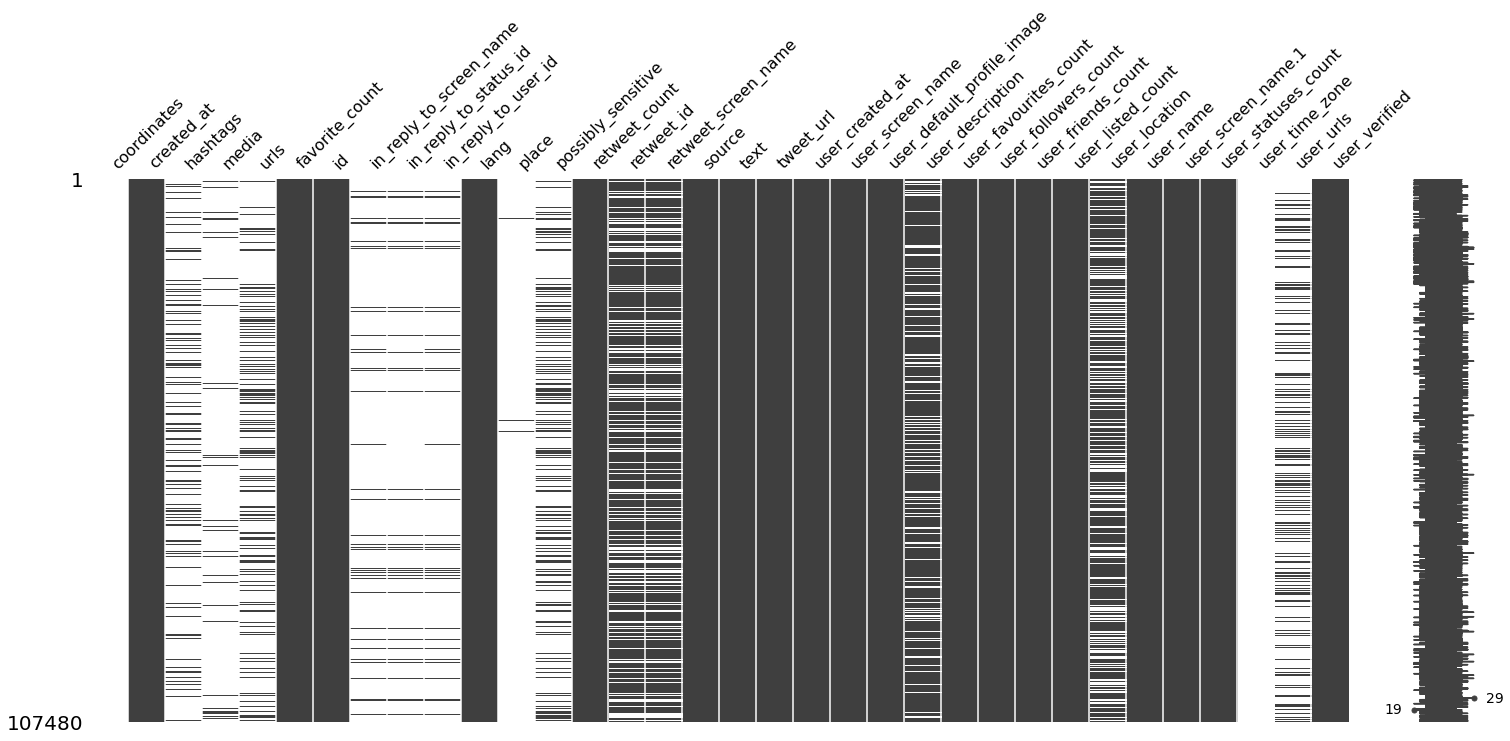

In [15]:
# analyze missing data
import missingno as msno
%matplotlib inline

fig = msno.matrix(joint_df)
fig_copy = fig.get_figure()
fig_copy.savefig('plot.png', bbox_inches = 'tight') # save visualization as image

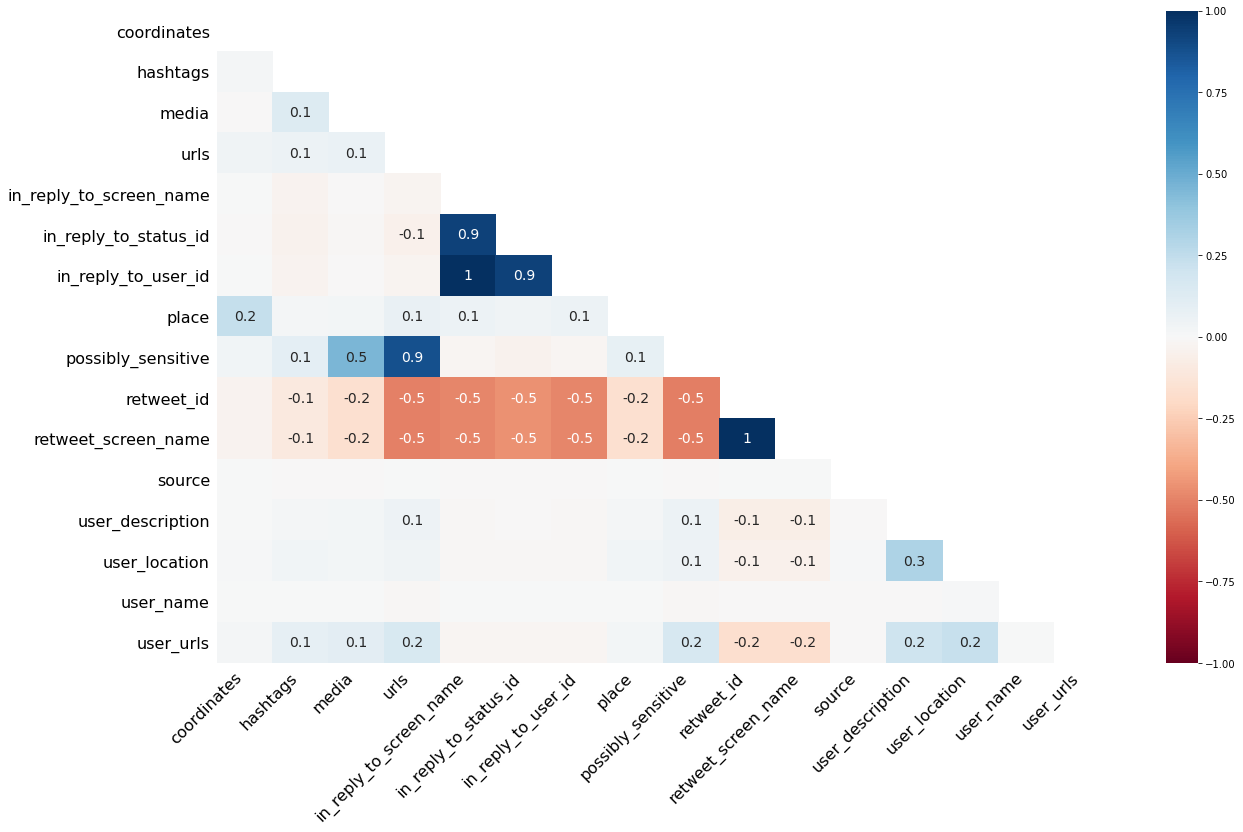

In [17]:
# missing data correlation matrix
fig = msno.heatmap(joint_df)
fig_copy = fig.get_figure()
fig_copy.savefig('missing_heatmap.png', bbox_inches = 'tight')

In [8]:
# method to remove stopwords from tokens
def remove_stopwords(tokens):
    clean_tokens = []
    for w in tokens:  
        if w not in stop_words:  
            clean_tokens.append(w)  
    return clean_tokens

In [9]:
# method to preprocess tweet
def preprocess_tweets(df):

    # removing links
    df['text_clean'] =  [re.sub(r"http\S+", "", str(x)) for x in df['text']]

    # removing @
    df['text_clean'] =  [re.sub(r"@\S+", "", str(x)) for x in df['text_clean']]

    # removing RTs
    df['text_clean'] =  [str(x).replace("RT", "") for x in df['text_clean']]

    # Remove all the special characters
    df['text_clean'] = [re.sub(r'\W', ' ',  str(x)) for x in df['text_clean']]

    # remove all single characters
    df['text_clean'] = [re.sub(r'\s+[a-zA-Z]\s+', ' ', str(x)) for x in df['text_clean']]
    
    # remove all numbers
    df['text_clean'] = [re.sub("\d+", "", str(x)) for x in df['text_clean']]

    # convert to lowercase
    df['text_clean']= [str(x).lower() for x in df['text_clean'] ]

    # Substituting multiple spaces with single space
    df['text_clean'] = [re.sub(r'\s+', ' ', str(x)) for x in df['text_clean']] 

    # tokenization
    df['tokenized'] = [word_tokenize(str(x)) for x in df['text_clean']] 

    # stopword removal
    df['clean_tokens'] = [remove_stopwords(x) for x in df['tokenized']]  

In [10]:
# preprocess all datasets
preprocess_tweets(march_df)
preprocess_tweets(april_df)
preprocess_tweets(may_df)
preprocess_tweets(june_df)
preprocess_tweets(july_df)

In [11]:
# save to csv - this will convert all the list types(tokens) into strings, save as pickle later
# march_df.to_csv("preprocessed_tweets/march_tweets.csv",index=False)
# april_df.to_csv("preprocessed_tweets/april_tweets.csv",index=False)
# may_df.to_csv("preprocessed_tweets/may_tweets.csv",index=False)
# june_df.to_csv("preprocessed_tweets/june_tweets.csv",index=False)
# july_df.to_csv("preprocessed_tweets/july_tweets.csv",index=False)

In [12]:
# view cleaned data sample
march_df.head()

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified,text_clean,tokenized,clean_tokens
0,NaN,Fri Mar 20 00:28:41 +0000 2020,NaN,NaN,https://www.facebook.com/121074941432371/posts...,1,1240797371895820288,chrislhayes,NaN,4207961.0,...,NaN,Scott Tuttle,TuttleDesign,387,NaN,NaN,False,iv vitamin has been successfully treatment fo...,"[iv, vitamin, has, been, successfully, treatme...","[iv, vitamin, successfully, treatment, corona,..."
1,NaN,Fri Mar 20 04:27:16 +0000 2020,NaN,NaN,NaN,0,1240857417266728960,NaN,NaN,NaN,...,Chile,[MVP] ~ Geᵰee ~,farawellmylove,281064,NaN,NaN,False,this man piss could stop corona,"[this, man, piss, could, stop, corona]","[man, piss, could, stop, corona]"
2,NaN,Thu Mar 19 23:48:06 +0000 2020,NaN,NaN,NaN,0,1240787162225917955,NaN,NaN,NaN,...,NaN,l,xolailaa1,4430,NaN,NaN,False,would really like to choke slam ms corona,"[would, really, like, to, choke, slam, ms, cor...","[would, really, like, choke, slam, ms, corona]"
3,NaN,Fri Mar 20 02:15:27 +0000 2020,NaN,NaN,NaN,0,1240824242343571458,NaN,NaN,NaN,...,NaN,Justin,susjustinn,42966,NaN,NaN,False,corona please we are tired we get it,"[corona, please, we, are, tired, we, get, it]","[corona, please, tired, get]"
4,NaN,Thu Mar 19 20:12:34 +0000 2020,NaN,NaN,NaN,0,1240732921570439172,NaN,NaN,NaN,...,NaN,"Jonathan Powell, ND",NaturoPowell,31950,NaN,NaN,False,trump is so mentally decompensated that he ca...,"[trump, is, so, mentally, decompensated, that,...","[trump, mentally, decompensated, even, remembe..."


In [13]:
# initialize lemmatizer, and method to lemmatize
wn = nltk.WordNetLemmatizer()
def lemmatizing(text):
    text = [wn.lemmatize(word) for word in text.split()]
    return str(text)

In [14]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 
def lemmatizing(text):
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return str(text)

In [15]:
# list of dataframes for each month
tweets_df = [march_df,april_df,may_df,june_df,july_df]

In [16]:
# lemmatize the text in each dataframe
for df in tweets_df:
    df['text_lemm'] = [lemmatizing(x) for x in df['text_clean']]
    df['text_lemm'] = [re.sub(r'/[^\x00-\x7F]+/', ' ', str(x)) for x in df['text_lemm']] 

In [19]:
# save the dataframes as pickle - this is done to maintain the datatype of the features in the frames
march_df.to_pickle("preprocessed_tweets/march_tweets.pickle")
april_df.to_pickle("preprocessed_tweets/april_tweets.pickle")
may_df.to_pickle("preprocessed_tweets/may_tweets.pickle")
june_df.to_pickle("preprocessed_tweets/june_tweets.pickle")
july_df.to_pickle("preprocessed_tweets/july_tweets.pickle")